# Usability of collected datasets

In [1]:
%run load.ipynb
import config as cf

In [2]:
cf.V1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2023 entries, 0 to 2022
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2022 non-null   object
 1   Action    1986 non-null   object
 2   Industry  1475 non-null   object
 3   Country   1785 non-null   object
 4   ИНН       1174 non-null   object
dtypes: object(5)
memory usage: 79.1+ KB


In [3]:
import warnings
from bs4 import BeautifulSoup
import requests
import pandas as pd

warnings.filterwarnings("ignore")

url = 'https://som.yale.edu/story/2022/over-1000-companies-have-curtailed-operations-russia-some-remain'
req = requests.get(url)
bs = BeautifulSoup(req.text)

data = pd.DataFrame({'Name' : [], 'Action' : [], 'Industry' : [], 'Country' : []})

def buyingTime(data):
    temp_text = bs.find('section', {'id' : 'buyingtime'}).text
    temp_arr = temp_text.split('\n')
    temp_arr = temp_arr[24:-7]
    temp_arr = [i for i in temp_arr if i != '']

    counter = 0
    t = []
    for i in temp_arr:
        t.append(i)
        counter += 1
        if counter == 4:
            data.loc[len(data)] = t
            t = []
            counter = 0

def scalingBack(data):
    temp_text = bs.find('section', {'id' : 'scalingback'}).text
    temp_arr = temp_text.split('\n')
    temp_arr = temp_arr[24:-7]
    temp_arr = [i for i in temp_arr if i != '']
    temp_arr.insert(109, 'NaN')
    temp_arr.insert(586, 'NaN')
    counter = 0
    t = []
    for i in temp_arr:
        t.append(i)
        counter += 1
        if counter == 4:
            data.loc[len(data)] = t
            t = []
            counter = 0

def suspension(data):
    temp_text = bs.find('section', {'id' : 'suspension'}).text
    temp_arr = temp_text.split('\n')
    temp_arr = temp_arr[24:-7]
    temp_arr = [i for i in temp_arr if i != '']
    temp_arr.insert(305, 'NaN')
    counter = 0
    t = []
    for i in temp_arr:
        t.append(i)
        counter += 1
        if counter == 4:
            data.loc[len(data)] = t
            t = []
            counter = 0

def withdrawal(data):
    temp_text = bs.find('section', {'id' : 'withdrawal'}).text
    temp_arr = temp_text.split('\n')
    temp_arr = temp_arr[24:-7]
    temp_arr = [i for i in temp_arr if i != '']
    counter = 0
    t = []
    for i in temp_arr:
        t.append(i)
        counter += 1
        if counter == 4:
            data.loc[len(data)] = t
            t = []
            counter = 0

buyingTime(data)
scalingBack(data)
suspension(data)
withdrawal(data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1355 entries, 0 to 1354
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      1355 non-null   object
 1   Action    1355 non-null   object
 2   Industry  1355 non-null   object
 3   Country   1355 non-null   object
dtypes: object(4)
memory usage: 52.9+ KB


In [5]:
data.isna().sum().sum()

0

In [6]:
cf.BB_BREAKING.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  251 non-null    object
 1    Move    251 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


In [7]:
cf.BB_BREAKING.isna().sum().sum()

0

In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

url = 'https://inkocoin.ru/spisok-kompanij-ushedshih-iz-rossii-2022-iz-za-ukrainy-i-sankcij/'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
req = requests.get(url, headers=headers)
src = req.text

soup = BeautifulSoup(src, 'lxml')
names = soup.findAll("ul")
all_companies = {}
i = 0
for ul in names:
    if 5 < i < 36 :
        for li in ul.findAll('li'):
            text = li.text
            if (text.find('\xa0—') != -1):
                if text[text.find('—')-1] == '\xa0':
                    text = text.split('\xa0—')
                else:
                    text = text.split ( ' —' )
                all_companies[text[0]] = text[1][1:-1]
            else:
                all_companies[text] = "-"
    i += 1

print(all_companies, sep='\n')


data = pd.DataFrame( {"Name" : [], "Action" : []} )

for i in all_companies:
    temp = []   
    temp.append(i)
    temp.append(all_companies.get(i))
    data.loc[len(data)] = temp
    temp.clear()

data.to_csv("../data/inkoin.csv", encoding='utf-8')

{'BTC-Alpha': 'заблокировала аккаунты россиян, приостановила работу с рублями', 'QMall\xa0': '-', 'Refinitiv\xa0': '-', 'CEX IO': 'приостановила регистрацию новых пользователей из России', 'Kuna\xa0': '-', 'Porsche': 'приостановила поставки', 'Jaguar Land Rover': 'приостановила поставки', 'General Motors': 'приостановила поставки', 'Volkswagen': 'приостановила поставки и производство', 'Skoda': 'приостановила поставки', 'Daimler Truck': 'приостановила работу с Камазом', 'Ford': 'приостановила деятельность', 'Scania': 'приостановила поставки', 'Honda': 'приостановила поставки', 'Mazda': 'приостановила поставки', 'Hyundai': 'приостановила производство', 'Seat': 'приостановила поставки', 'Lamborghini': 'приостановила поставки', 'Ducati': 'приостановила поставки', 'Bentley': 'приостановила поставки', 'Mercedes-Benz': 'приостановила производство и поставки', 'Toyota': 'приостановила производство и поставки', 'Lexus': 'приостановила производство и поставки', 'MAN': 'приостановила поставки', 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 351 entries, 0 to 350
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    351 non-null    object
 1   Action  351 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB


In [10]:
data.isna().sum().sum()

0

In [2]:
import pandas as pd

d = {'Dataset': ['Yale CELI', 'D. Agniashvily', 'Sovcombank', 'InkioN', 'rozetked.me', 'BanksToday', 'всезамопмним.рф'],
     'Usability #scale 1-10': [10, 5, 7, 8, 7, 7, 10],
     'Missing Values #amount': [0, 0, 0, 5, 0, 0, 0],
     'Timeline Gaps #amount': [0, 0, 0, 0, 0, 0, 0],
     'Parsing Convinience #scale 1-10': [10, 5, 7, 9, 7, 7, 10]}
df = pd.DataFrame(data=d)

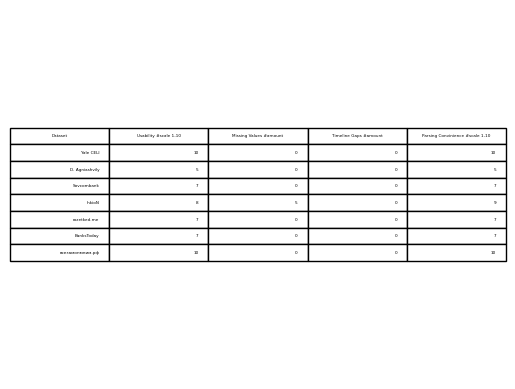

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')

table = ax.table(cellText=df.values, colLabels=df.columns, loc='center')

In [6]:
from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages("../docs/graphics/usability.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()